In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('./housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

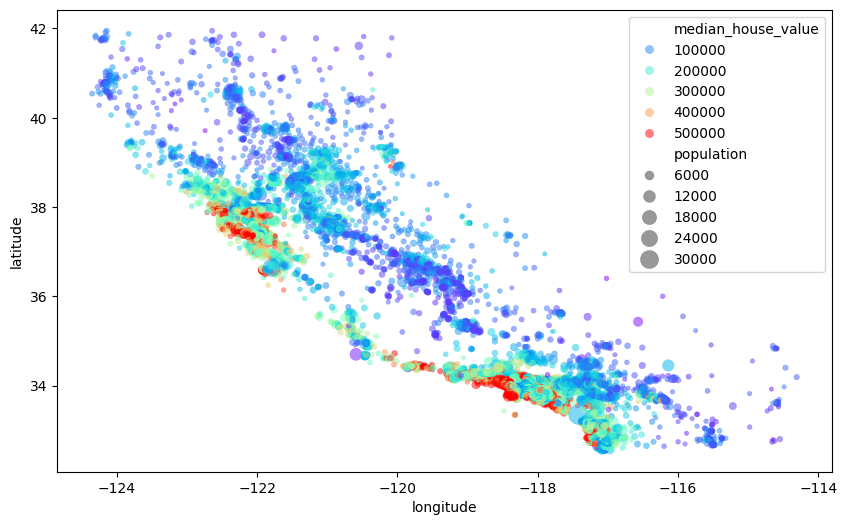

In [6]:
plt.figure(figsize=(10,6))

scatter = sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='median_house_value',
    size='population',
    sizes=(10, 200),  # Adjust min/max size of points
    palette='rainbow',
    alpha=0.5,
    edgecolor=None,
    legend='brief'
)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

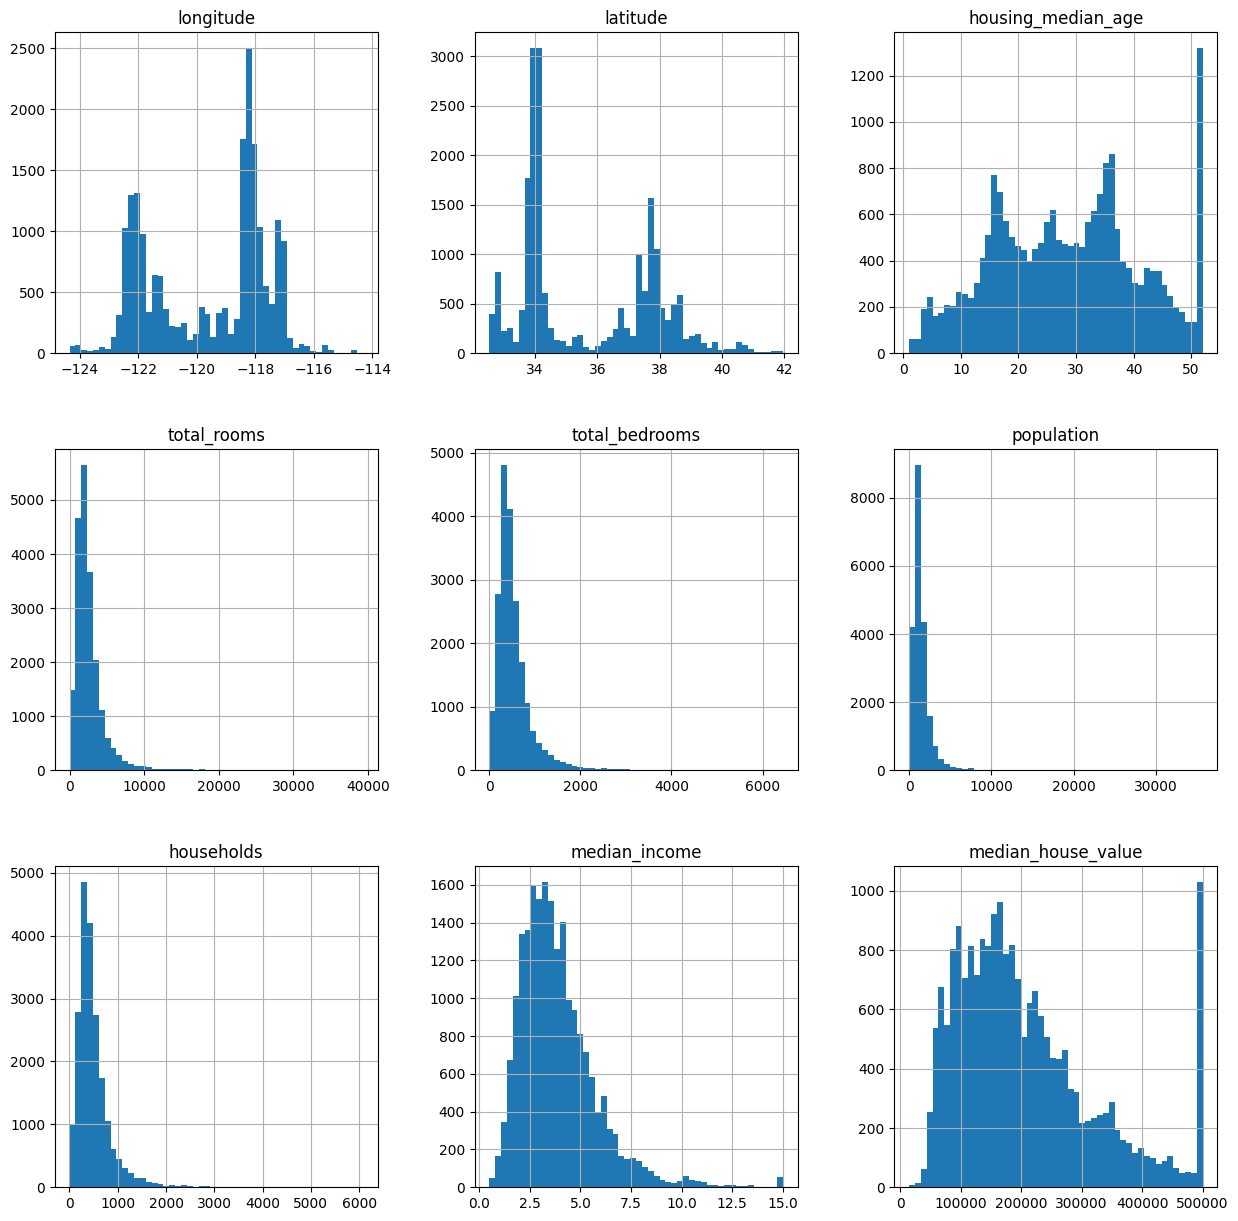

In [7]:
df.hist(bins=50, figsize=(15,15))

In [8]:
# Fill missing values in 'total_bedrooms' with the median of the column
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Convert categorical variable 'ocean_proximity' to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['ocean_proximity'])

C:\Users\HP\AppData\Local\Temp\ipykernel_23668\1018269164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


<Axes: >

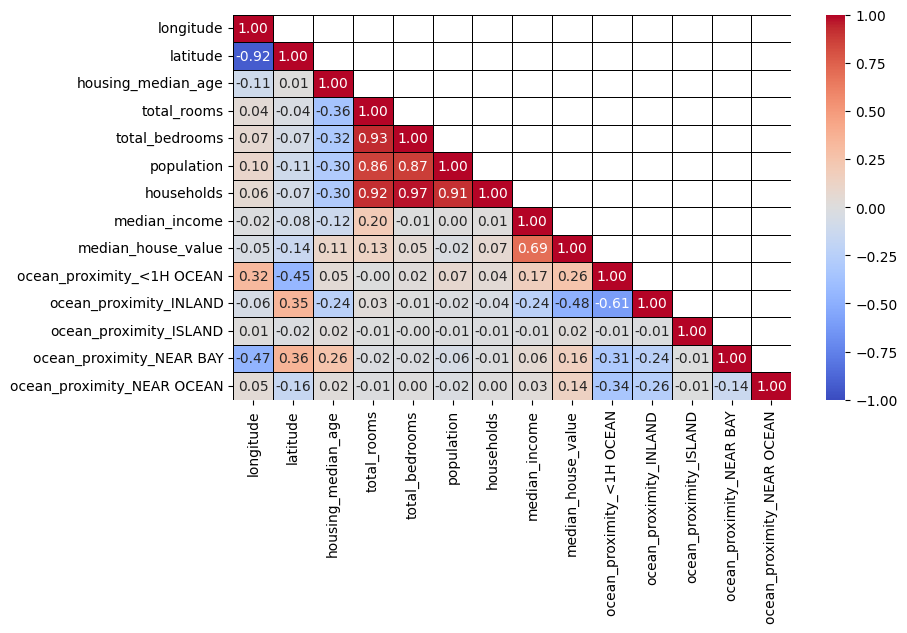

In [9]:
# Split the dataset into features and target variable
plt.figure(figsize=(9,5))

mask = np.triu(np.ones_like(df.corr(), dtype=bool),k=1)

sns.heatmap(df.corr(), 
            mask=mask, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            linewidths=0.5, 
            linecolor='black',
            vmin=-1,vmax=1)

In [16]:
df = df.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_1H_OCEAN'})

In [17]:
# Split the dataset into features and target variable
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [18]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Import necessary libraries for model training and evaluation
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error

In [59]:

# Create the model
model_gbm = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=None,
    subsample=0.8,
    colsample_bytree=0.8,    
    reg_alpha=1.0,      # L1 regularization
    reg_lambda=5.0,     # L2 regularization
    random_state=42
)

# Train
model_gbm.fit(X_train, y_train)

# Predict
y_pred_gbm = model_gbm.predict(X_test)

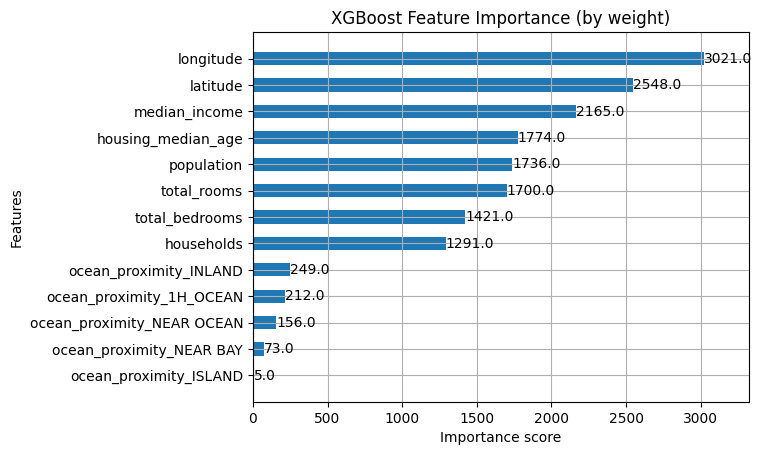

In [60]:
# Plot feature importance
xgb.plot_importance(model_gbm, importance_type='weight', height=0.5)
plt.title("XGBoost Feature Importance (by weight)")
plt.show()

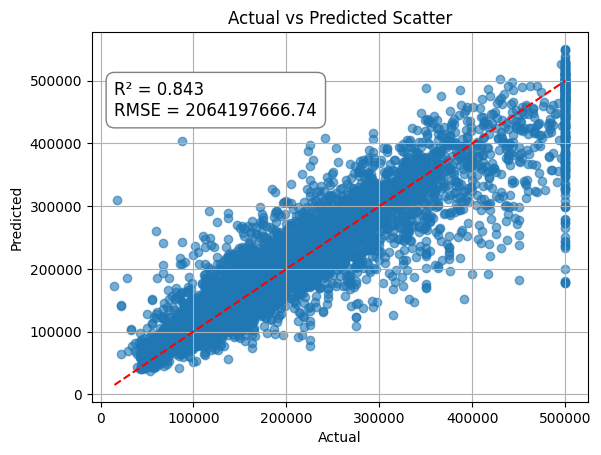

In [ ]:
# Calculate metrics
r2 = r2_score(y_test, y_pred_gbm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbm))  


# Plot actual vs predicted values
plt.scatter(y_test, y_pred_gbm, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Scatter")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line

plt.text(
    x=y_test.min(), 
    y=y_test.max(), 
    s=f"R² = {r2:.3f}\nRMSE = {rmse:.2f}", 
    fontsize=12, 
    verticalalignment='top', 
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.show()
